In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [9]:
df = pd.read_csv("C:\\data science\\delivery_time.csv")

In [10]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [16]:
dataset=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
# applying log transformations to 'Delivery time'
dataset['delivery_time_log'] = np.log1p(dataset['delivery_time'])

In [25]:
dataset.describe()

,delivery_time,sorting_time,delivery_time_log
count,21.000000,21.000000,21.000000
mean,16.790952,6.190476,2.838087
std,5.074901,2.542028,0.297715
min,8.000000,2.000000,2.197225
25%,13.500000,4.000000,2.674149
50%,17.830000,6.000000,2.935451
75%,19.750000,8.000000,3.032546
max,29.000000,10.000000,3.401197


In [26]:
dataset.isnull().sum()

delivery_time        0
sorting_time         0
delivery_time_log    0
dtype: int64

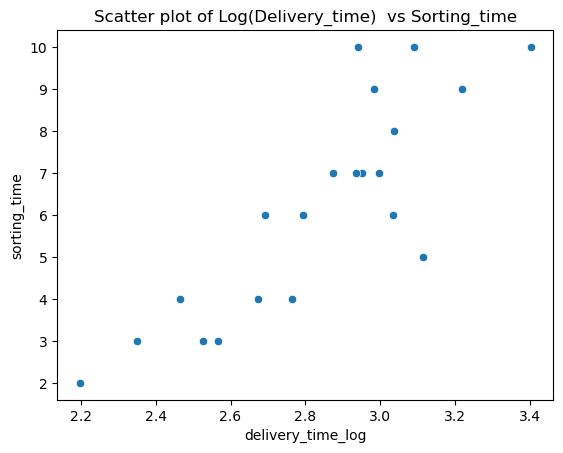

In [27]:
# Visualize the relationship between Sorting_time and Delivery_time
import matplotlib.pyplot as plt
sns.scatterplot(x='delivery_time_log', y='sorting_time', data=dataset)
plt.title('Scatter plot of Log(Delivery_time)  vs Sorting_time')
plt.show()

In [29]:
# Split the data into training and testing sets
X = dataset[['delivery_time_log']]  
y = dataset['sorting_time']  

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
LE = LinearRegression()
LE.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = LE.predict(X_test)

In [33]:
# Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6780710633148246
Mean Squared Error: 3.9515158202475553
Root Mean Squared Error: 1.9878420008259094


In [36]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [37]:
# MODEL BUILDING
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [38]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [39]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [40]:
delivery_time = (6.582734) + (1.649020)*(5)

In [41]:
delivery_time

14.827834

# Question - 2

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [43]:
df = pd.read_csv("C:\\data science\\Salary_Data.csv")

In [44]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [46]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
df.shape

(30, 2)

In [48]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


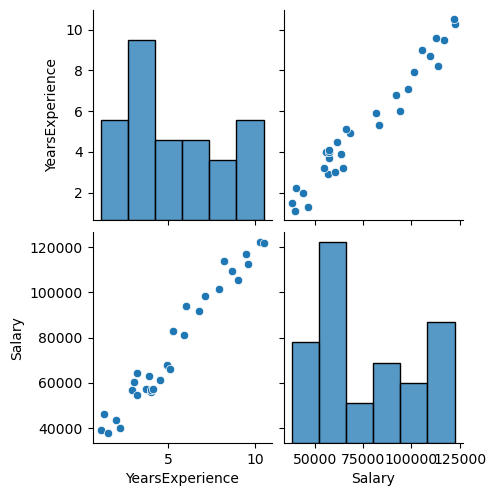

In [49]:
# Pairplot for initial visualization
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

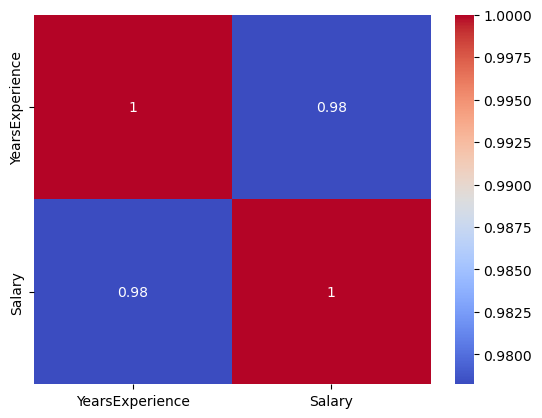

In [50]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Data Transformation
X = df[['YearsExperience']]

In [54]:
# Apply log transformation to the dependent variable
y = np.log1p(df['Salary'])

In [55]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Initialize the model
from sklearn.linear_model import LinearRegression
LE = LinearRegression()

In [57]:
# Train the model
LE.fit(X_train, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred = LE.predict(X_test)

In [59]:
# Print model coefficients and intercept
print('Coefficients:', LE.coef_)
print('Intercept:', LE.intercept_)

Coefficients: [0.12704496]
Intercept: 10.485275855567883


In [65]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.01342958036461323
R-squared: 0.8120972215230318
